# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged = pd.merge(mouse_metadata,study_results)

# Display the data table for preview
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merged['Mouse ID'].unique())


249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = merged.loc[merged.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
dup


array(['g989'], dtype=object)

In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
merged.loc[merged["Mouse ID"]=="g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = merged[merged['Mouse ID']!="g989"]
cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice in the clean DataFrame.
merged2['Mouse ID'].nunique()

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary= pd.DataFrame({"Mean":mean,"Median":median,"Variance":var,"Standard Deviation":std,"SEM":sem})
summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

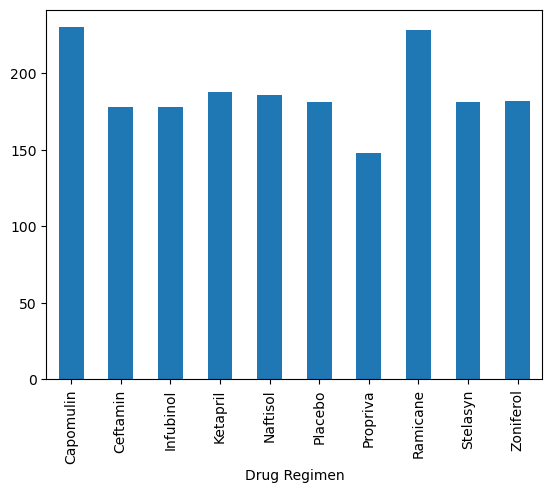

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows = cleaned.groupby(["Drug Regimen"]).count()["Mouse ID"]
rows.plot(kind="bar")

plt.show()

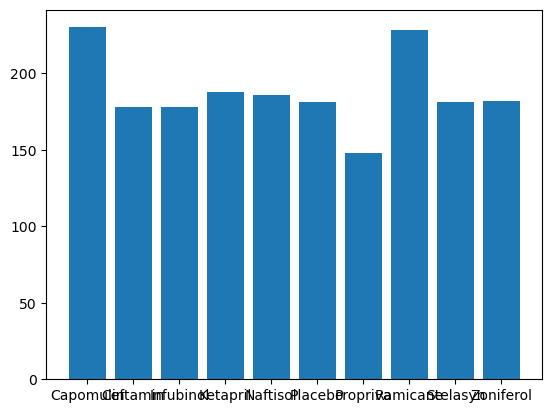

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(rows.index,rows.values)
plt.show()



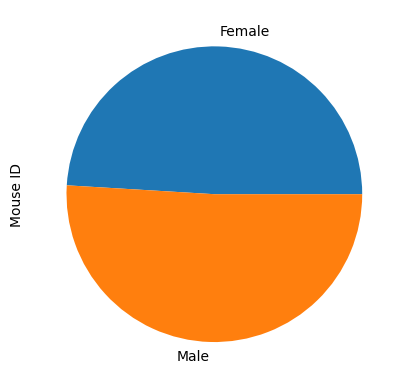

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = cleaned.groupby(["Sex"]).count()["Mouse ID"]
sex.plot(kind="pie")
plt.show()

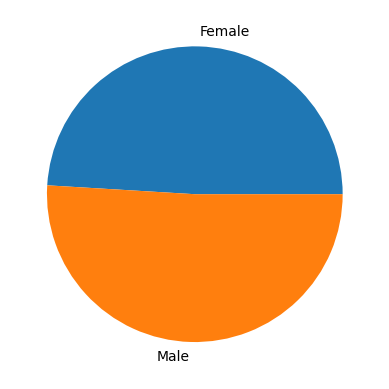

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(labels=sex.index,x=sex.values)
plt.show()


## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtp = cleaned.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_max = pd.merge(maxtp,cleaned,on=("Mouse ID","Timepoint"))
merged_max


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [70]:
y = merged_max.loc[merged_max['Drug Regimen']==x,:]["Tumor Volume (mm3)"]
y

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [74]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    y = merged_max.loc[merged_max['Drug Regimen']==x,:]["Tumor Volume (mm3)"]
    quartiles = y.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lowerb = lowerq - (1.5*iqr)
    upperb = upperq + (1.5*iqr)
    tumor_vol.append(y)
    print(f"For {x} the iqr is {iqr} ")
    print(f"For {x} values lower than {lowerb} or greater than {upperb} could be an outlier")
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


For Capomulin the iqr is 7.781863460000004 
For Capomulin values lower than 20.70456164999999 or greater than 51.83201549 could be an outlier
For Ramicane the iqr is 9.098536719999998 
For Ramicane values lower than 17.912664470000003 or greater than 54.30681135 could be an outlier
For Infubinol the iqr is 11.477135160000003 
For Infubinol values lower than 36.83290494999999 or greater than 82.74144559000001 could be an outlier
For Ceftamin the iqr is 15.577752179999997 
For Ceftamin values lower than 25.355449580000002 or greater than 87.66645829999999 could be an outlier


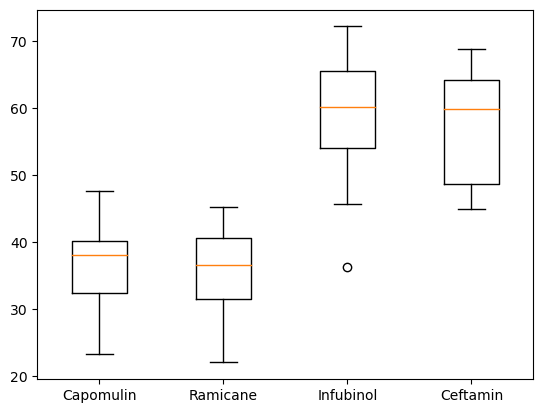

In [78]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol,labels=treatments)
plt.show()

## Line and Scatter Plots

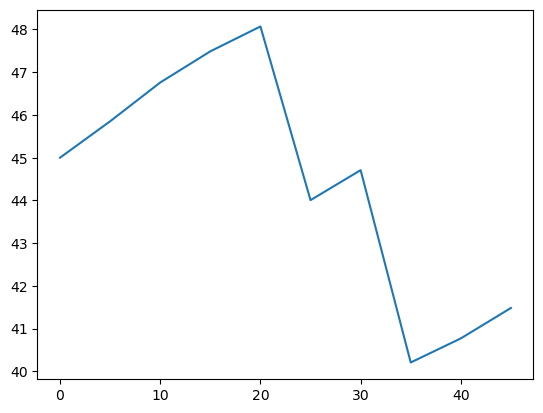

In [82]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line = cleaned.loc[cleaned["Mouse ID"]=='l509',:]
plt.plot(line["Timepoint"],line["Tumor Volume (mm3)"])
plt.show()

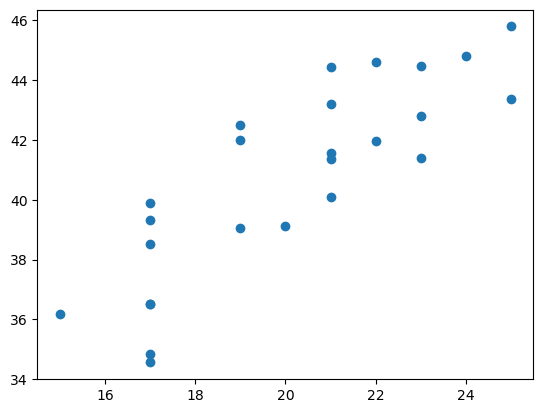

In [128]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# scatter = cleaned.groupby(['Weight (g)']).mean()["Tumor Volume (mm3)"]
# plt.scatter(scatter["Weight (g)"],line["Tumor Volume (mm3)"])
# plt.show()
capo = cleaned.loc[cleaned['Drug Regimen']=='Capomulin',:][["Mouse ID",'Weight (g)',"Tumor Volume (mm3)"]]
capo_avg = capo.groupby(["Mouse ID"]).mean()

plt.scatter(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"])

plt.show()

## Correlation and Regression

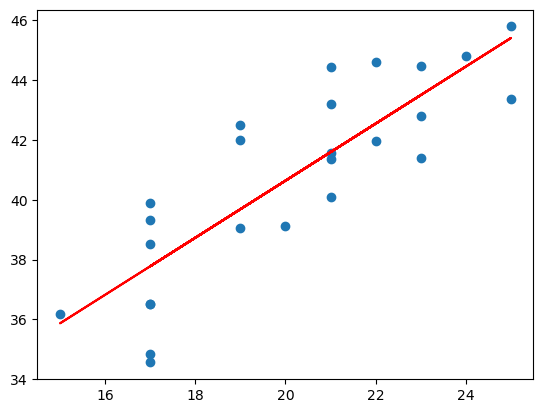

correlation between mouse weight and average tumor volume is PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712616e-07). The r squared is 0.7088568047708723


In [133]:
from scipy.stats import linregress
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values=capo_avg["Weight (g)"]
y_values=capo_avg["Tumor Volume (mm3)"]

correlation = st.pearsonr(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"])
plt.plot(capo_avg["Weight (g)"],regress_values,color="red")
plt.show()
print(f'correlation between mouse weight and average tumor volume is {correlation}. The r squared is {rvalue**2}')